In [11]:
df_train = pd.read_csv('../train.csv')
df_train.columns
pd.set_option("display.max_rows",999)

In [12]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [13]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...
df_train.tail()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [15]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


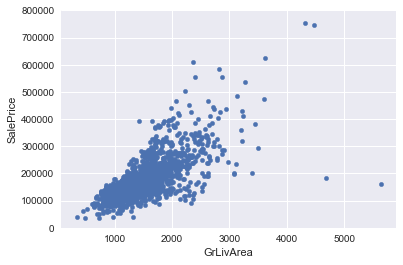

In [16]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

In [17]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)


                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1458.000000  1458.000000    1458.000000  1458.000000  1458.000000   
mean    729.664609    56.879287   10480.759259     6.097394     5.576132   
std     421.292000    42.325185    9889.677637     1.379866     1.113359   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.250000    20.000000    7544.500000     5.000000     5.000000   
50%     729.500000    50.000000    9475.000000     6.000000     5.000000   
75%    1093.750000    70.000000   11600.000000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1458.000000   1458.000000  1458.000000  1458.000000  1458.000000   
mean   1971.218793   1984.834705   440.377229    46.613169   567.435528   
std      30.194556     20.642513   435.435453   161.420729   442.136065   
min    1872.000

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1158,1159,20,RL,11932,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2008,ConLD,Partial,235128
1159,1160,60,RL,9120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,185000
1160,1161,160,RL,2280,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2010,WD,Normal,146000
1161,1162,20,RL,14778,Pave,IR1,Low,AllPub,CulDSac,Gtl,...,0,216,0,0,0,11,2008,WD,Normal,224000
1162,1163,20,RL,8724,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,129000
1163,1164,90,RL,12900,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2008,WD,Alloca,108959
1164,1165,80,RL,16157,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,194000
1165,1166,20,RL,9541,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2009,New,Partial,233170
1166,1167,20,RL,10475,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,245350
1167,1168,60,RL,10852,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2006,WD,Normal,173000


In [18]:
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)
print(df_train.describe())
df_train.tail(300)

                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1457.000000  1457.000000    1457.000000  1457.000000  1457.000000   
mean    729.805765    56.877145   10460.434454     6.094715     5.576527   
std     421.402158    42.339638    9862.564977     1.376542     1.113638   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.000000    20.000000    7540.000000     5.000000     5.000000   
50%     730.000000    50.000000    9473.000000     6.000000     5.000000   
75%    1094.000000    70.000000   11600.000000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1457.000000   1457.000000  1457.000000  1457.000000  1457.000000   
mean   1971.194235   1984.818806   439.128346    46.645161   567.222375   
std      30.190353     20.640669   432.964939   161.471529   442.212926   
min    1872.000

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1158,1159,20,RL,11932,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2008,ConLD,Partial,235128
1159,1160,60,RL,9120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,185000
1160,1161,160,RL,2280,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2010,WD,Normal,146000
1161,1162,20,RL,14778,Pave,IR1,Low,AllPub,CulDSac,Gtl,...,0,216,0,0,0,11,2008,WD,Normal,224000
1162,1163,20,RL,8724,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,129000
1163,1164,90,RL,12900,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2008,WD,Alloca,108959
1164,1165,80,RL,16157,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,194000
1165,1166,20,RL,9541,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2009,New,Partial,233170
1166,1167,20,RL,10475,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,245350
1167,1168,60,RL,10852,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2006,WD,Normal,173000


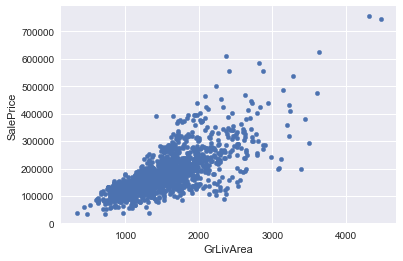

In [19]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');

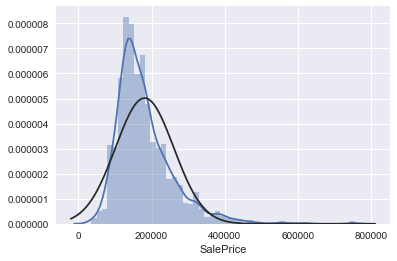

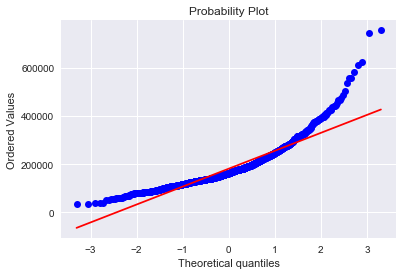

In [22]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

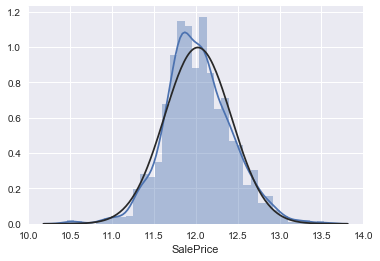

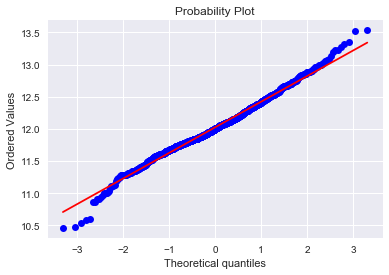

In [23]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [ ]:
df_train